In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [11]:
from matplotlib import pyplot as plt

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

> Load Fashion-MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
type(fashion_mnist)

tuple

In [5]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
print(f"X Train: {X_train.shape}", end=", ")
print(f"X Test: {X_test.shape}", end=", ")
print(f"X Valid: {X_valid.shape}")

print(f"Y Train: {y_train.shape}", end=", ")
print(f"Y Test: {y_test.shape}", end=", ")
print(f"Y Valid: {y_valid.shape}")

X Train: (55000, 28, 28), X Test: (10000, 28, 28), X Valid: (5000, 28, 28)
Y Train: (55000,), Y Test: (10000,), Y Valid: (5000,)


In [7]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [8]:
X_train.shape

(55000, 28, 28)

In [9]:
# X_train[0]

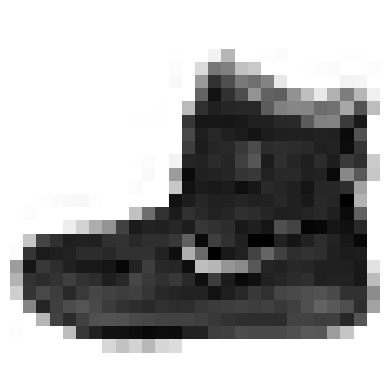

In [12]:
# extra code

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [14]:
from random import randrange
random_location = np.random.randint(10,25)
print(random_location)
print(y_train[random_location])
print(class_names[y_train[random_location]])

24
4
Coat


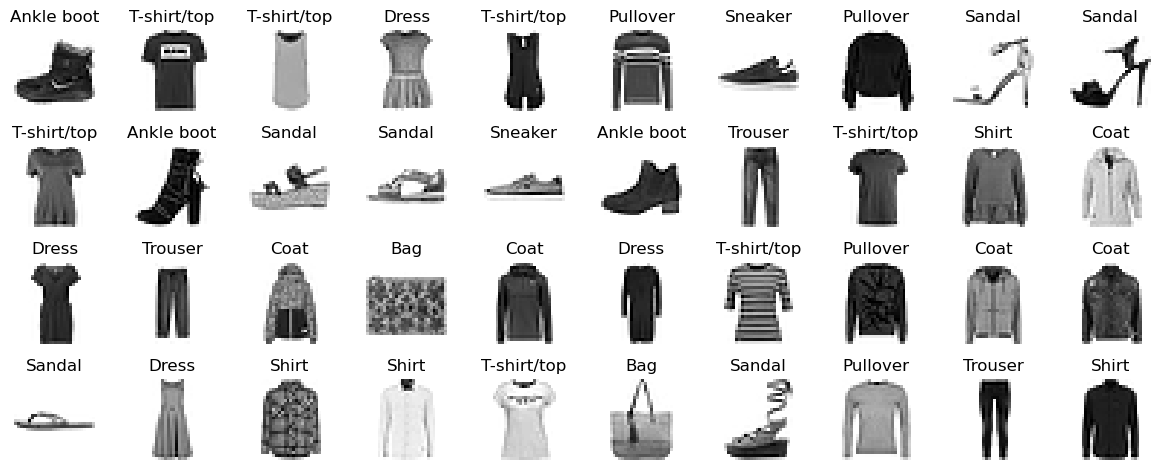

In [15]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

### Sequential API

In [16]:
print(list(X_train.shape[-2:]))
print(len(class_names))

[28, 28]
10


In [17]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


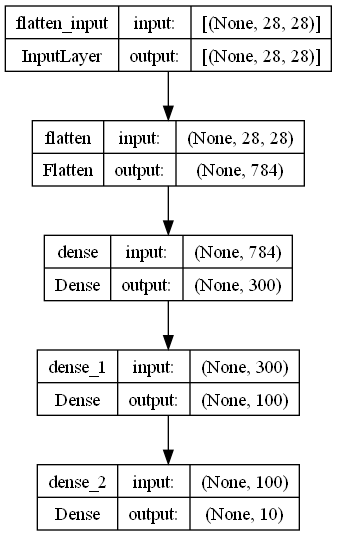

In [19]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [20]:
model.layers

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

> Accessing parameters of a layer

In [22]:
weights, biases = hidden1.get_weights()
print(weights.shape); print(biases.shape)
weights

(784, 300)
(300,)


array([[ 0.07062341, -0.03915215,  0.06163426, ...,  0.07129605,
        -0.04559567,  0.05217826],
       [-0.0022452 ,  0.04076044,  0.06164387, ..., -0.00692376,
        -0.01324991, -0.01239661],
       [ 0.01283611,  0.04061738,  0.05201021, ...,  0.01580306,
        -0.04089696,  0.01450614],
       ...,
       [-0.03161714, -0.00909757, -0.07005519, ..., -0.0692674 ,
         0.02064713,  0.00771198],
       [-0.05602711,  0.0674881 ,  0.04766244, ..., -0.04461262,
         0.04135774,  0.0543388 ],
       [-0.0507772 , -0.05997454,  0.05902706, ..., -0.0088552 ,
        -0.06218321,  0.03389727]], dtype=float32)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Compiling the model

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [25]:
# extra code – this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [26]:
# Sparse Labels -> One-Hot Vector Labels
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# One-Hot Vector Labels -> Sparse Labels
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

### Training and evaluating the model

In [28]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7038 - sparse_categorical_accuracy: 0.7686 - val_loss: 0.5020 - val_sparse_categorical_accuracy: 0.8290
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4806 - sparse_categorical_accuracy: 0.8329 - val_loss: 0.4531 - val_sparse_categorical_accuracy: 0.8342
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4367 - sparse_categorical_accuracy: 0.8461 - val_loss: 0.4194 - val_sparse_categorical_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4128 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.3916 - val_sparse_categorical_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3927 - sparse_categorical_accuracy: 0.8625 - val_loss: 0.3860 - val_sparse_categorical_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3764 - spars

In [29]:
# Training parameters
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [30]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


### Learning Curve

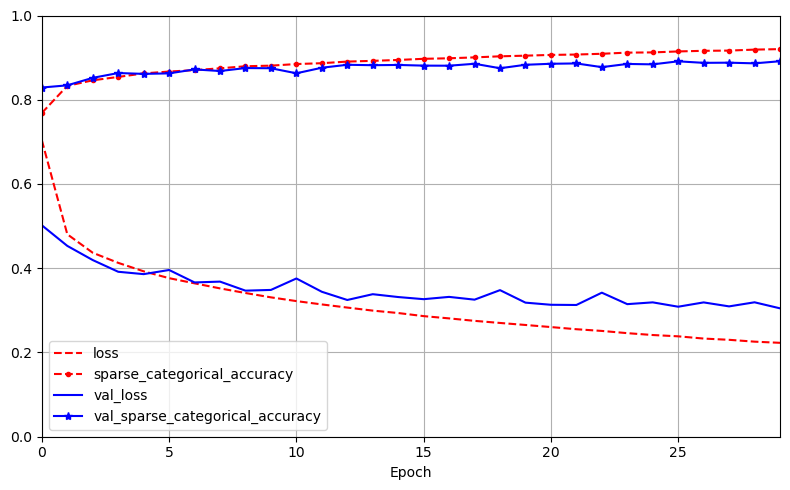

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

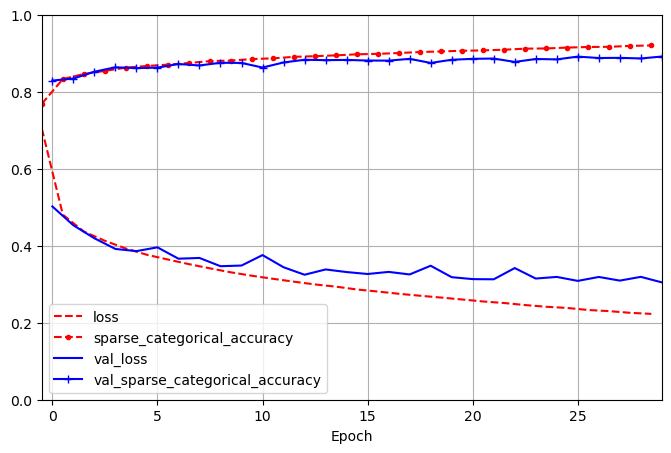

In [32]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-+"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [33]:
print(type(history))
print(type(model))

<class 'keras.callbacks.History'>
<class 'keras.engine.sequential.Sequential'>


In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3228 - sparse_categorical_accuracy: 0.8853


[0.322803258895874, 0.8852999806404114]

### Using the model to make predictions

In [37]:
X_new = X_test[:3]
print(X_new)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [38]:
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 22ms/step


array([[7.2746197e-06, 2.1124047e-06, 1.8058838e-05, 9.9735553e-07,
        3.4124507e-06, 8.6511187e-03, 3.3309148e-05, 2.6198126e-02,
        1.7822839e-04, 9.6490741e-01],
       [4.4598288e-05, 1.6130361e-08, 9.9589193e-01, 3.6563368e-09,
        3.3342901e-03, 6.6392958e-13, 7.2916859e-04, 2.4458661e-11,
        2.1704851e-09, 9.4016427e-11],
       [1.3626723e-05, 9.9998569e-01, 3.5353370e-08, 5.3921974e-07,
        4.4514064e-08, 2.5213930e-11, 8.7451495e-09, 4.7047795e-12,
        2.1724524e-08, 6.3706831e-11]], dtype=float32)

In [41]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [46]:
print(f"Predictions: {y_pred}")
print(f"Actual: {y_test[:3]}") # As, the prediction was made on X_new, and X_new is: X_new = X_test[:3]

Predictions: [9 2 1]
Actual: [9 2 1]


In [47]:
print(np.array(class_names)[y_pred])

['Ankle boot' 'Pullover' 'Trouser']


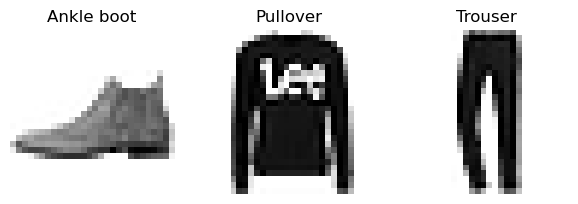

In [48]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## Building a Regression MLP Using the Sequential API

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [50]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

In [52]:
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8730 - root_mean_squared_error: 0.9344 - val_loss: 0.7575 - val_root_mean_squared_error: 0.8704
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3897 - root_mean_squared_error: 0.6243 - val_loss: 0.6007 - val_root_mean_squared_error: 0.7751
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3583 - root_mean_squared_error: 0.5986 - val_loss: 0.3739 - val_root_mean_squared_error: 0.6115
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3447 - root_mean_squared_error: 0.5871 - val_loss: 0.4238 - val_root_mean_squared_error: 0.6510
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3322 - root_mean_squared_error: 0.5764 - val_loss: 0.3199 - val_root_mean_squared_error: 0.5656
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3190 - root_mean_squared_error: 0.5648 - val_loss: 0.3486 - val_

In [55]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 29ms/step


In [56]:
rmse_test

0.5252104997634888

In [57]:
y_pred

array([[0.515194 ],
       [0.9576112],
       [4.962288 ]], dtype=float32)

## Building Complex Models Using the Functional API

In [58]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)